# Loan Data From Prosper - Data Exploration
## By Hudson Nandere Lubinga

## Introduction
> The 'Loan Data From Prosper' data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Prosper is the first peer-to-peer lending marketplace in the US founded way back in 2005. Since then, this company has facilitated more than USD 12 billion in loans to more than 770,000 people (https://www.prosper.com/about).


## Preliminary Wrangling


> We are first going to load all the required packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> We then load our 'prosperLoanData.csv' data set and then display the first 5 rows for basic visual exploration.


In [2]:
# Load the dataset into a data frame
df = pd.read_csv('prosperLoanData.csv')

# display the first five rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Display any 5 rows raandomly to further visualize our dataset
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
108598,F4953536175053465764C1D,551153,2012-01-12 18:14:01.193000000,NaN,60,Current,NaN,0.14766,0.1296,0.1196,...,-298.43,0.0,0.0,0.0,0.0,1.0,0,0,0.0,199
92810,FA503469014383155436805,436038,2009-11-30 19:29:23.280000000,NaN,36,Completed,2011-06-14 00:00:00,0.25785,0.2350,0.2250,...,-23.84,0.0,0.0,0.0,0.0,1.0,0,0,0.0,72
75712,F7CF3578490716780E3CB7E,779732,2013-05-15 16:42:03.260000000,NaN,36,Current,NaN,0.26528,0.2272,0.2172,...,-49.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
74815,642C3591705950370A4927E,944986,2013-10-10 06:41:11.453000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,...,-32.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
73797,3EFC3414494777317738001,283122,2008-02-22 13:20:47.857000000,E,36,Completed,2010-07-29 00:00:00,0.21178,0.1900,0.1800,...,-41.08,0.0,0.0,0.0,0.0,1.0,0,0,0.0,124


In [4]:
# Find the number of rows and columns in the dataset
df.shape

(113937, 81)

>From the above observation using the shape() method, our data frame has 113937 rows and 81

In [5]:
# Get more infomation about the data frame by listing all columns, their null-count and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Check for Duplicates
> By choosing any of the IDs in the dataset, we chan get the numbe of unique values using the nunique() function

In [6]:
# Find the number of unique 'LoanKey'
df["LoanKey"].nunique()

113066

In [7]:
# Find the number of unique 'ListingKey'
df.ListingKey.nunique()

113066

> From the above reuslts, there seems to be multiple loan identifiers. 
Let us use the duplicated() and count() method to prove and then display the first five values

In [8]:
# Count the number of duplicated 'ListingKey'
df[df.ListingKey.duplicated() == True].count()['ListingKey']

871

In [9]:
# Show the first five duplicated 'ListingKey'
df[df.ListingKey.duplicated() == True]['ListingKey'].head()

9       0F043596202561788EA13D5
999     0A0635972629771021E38F3
2539    2D2635984503681189056B4
4942    4B7E3590031274113F1FD34
5812    94B035909835592957503E6
Name: ListingKey, dtype: object

> It is suprising that the sum of duplicated rows for the entire dataset gives a result of 0 as shown below:

In [10]:
# Find the sum of duplicated rows
df.duplicated().sum()

0

>After thorough analysis, I found out that there is a column, 'ProsperScore'with problems. According to the data dictionary, this column should have values that do not exceed 10. This column has some incorrect values as shown in the example below:

In [11]:
# Display the values of 'ProsperScore' using the 'ListingKey'
df[df.ListingKey == '0F043596202561788EA13D5']['ProsperScore']

8     9.0
9    11.0
Name: ProsperScore, dtype: float64

> We are going to drop this column 'ProsperScore' which has problems and then check for the sum of duplicated rows again

In [12]:
# drop column 'ProsperScore' 
df.drop('ProsperScore', axis = 1, inplace = True)

In [13]:
# Display the total number of duplicated rows
df.duplicated().sum()

871

> Now we are able to see the 871 duplicated rows as realized before.
>Next, we are going to drop all these duplicated rows and check again.

In [14]:
# Drop duplicated rows
df.drop_duplicates(inplace = True)

In [15]:
# Check if duplicated 'ListingKey' values still exist in the dataset
df[df.ListingKey.duplicated() == True].count()['ListingKey']

0

In [16]:
# Display the total number of duplicated rows
df.duplicated().sum()

0

In [17]:
# Show number of unique 'ListingKey' values
df.ListingKey.nunique()

113066

In [18]:
# Display the number of rows and columns for the dataset
df.shape

(113066, 80)

> From the above cells, we realize that we no longer have duplicates, and the shape of our dataset has now changed to 113,066 rows and 80 columns

#### Selecting the Target Columns/Variables
>This dataset has 81 columns/variables. Four our analysis, we are going to choose 20 variables of the most interesting ones. The data dictionary will assist us to know the most relevant variables (https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000).

In [19]:
# Create a new data frame called 'df_target' which contains only the selected columns/variables
df_target = df[['LoanKey', 'LoanOriginationDate',
               'ClosedDate', 'LoanStatus',
               'Term', 'LoanOriginalAmount',
               'MonthlyLoanPayment', 'ListingCategory (numeric)',
               'BorrowerAPR', 'BorrowerRate',
               'CreditGrade', 'ProsperRating (Alpha)',
               'CreditScoreRangeLower', 'CreditScoreRangeUpper',
               'IncomeRange', 'IncomeVerifiable',
               'StatedMonthlyIncome', 'DebtToIncomeRatio',
               'EmploymentStatus', 'IsBorrowerHomeowner']]

# Preview the first five rows in our new 'df_taret' dataframe
df_target.head()

,LoanKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory (numeric),BorrowerAPR,BorrowerRate,CreditGrade,ProsperRating (Alpha),CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner
0,E33A3400205839220442E84,2007-09-12 00:00:00,2009-08-14 00:00:00,Completed,36,9425,330.43,0,0.16516,0.1580,C,NaN,640.0,659.0,"$25,000-49,999",True,3083.333333,0.17,Self-employed,True
1,9E3B37071505919926B1D82,2014-03-03 00:00:00,NaN,Current,36,10000,318.93,2,0.12016,0.0920,NaN,A,680.0,699.0,"$50,000-74,999",True,6125.000000,0.18,Employed,False
2,6954337960046817851BCB2,2007-01-17 00:00:00,2009-12-17 00:00:00,Completed,36,3001,123.32,0,0.28269,0.2750,HR,NaN,480.0,499.0,Not displayed,True,2083.333333,0.06,Not available,False
3,A0393664465886295619C51,2012-11-01 00:00:00,NaN,Current,36,10000,321.45,16,0.12528,0.0974,NaN,A,800.0,819.0,"$25,000-49,999",True,2875.000000,0.15,Employed,True
4,A180369302188889200689E,2013-09-20 00:00:00,NaN,Current,36,15000,563.97,2,0.24614,0.2085,NaN,D,680.0,699.0,"$100,000+",True,9583.333333,0.26,Employed,True


In [20]:
# Get the number of rows and columns for the 'df_target' dataframe
df_target.shape

(113066, 20)

In [21]:
# Further explore the 'df_target' dataframe
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 20 columns):
LoanKey                      113066 non-null object
LoanOriginationDate          113066 non-null object
ClosedDate                   55076 non-null object
LoanStatus                   113066 non-null object
Term                         113066 non-null int64
LoanOriginalAmount           113066 non-null int64
MonthlyLoanPayment           113066 non-null float64
ListingCategory (numeric)    113066 non-null int64
BorrowerAPR                  113041 non-null float64
BorrowerRate                 113066 non-null float64
CreditGrade                  28953 non-null object
ProsperRating (Alpha)        83982 non-null object
CreditScoreRangeLower        112475 non-null float64
CreditScoreRangeUpper        112475 non-null float64
IncomeRange                  113066 non-null object
IncomeVerifiable             113066 non-null bool
StatedMonthlyIncome          113066 non-null float64
DebtToI

#### Handling issues in our 'df_target' dataset

>By looking at the result of the info() function above, we still have some issues. 

>1. We are going to set 'LoanKey' column as the index 
>2. Rename columns which have white spaces in their names
>3. Change the 'LoanOriginationDate' and 'ClosedDate' columns to a proper datatype, i.e, datetime

In [22]:
# Set 'LoanKey as index'
df_target.set_index('LoanKey', inplace = True)

In [23]:
# Rename columns which have white spaces in their names
df_target.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating',
                          'ListingCategory (numeric)': 'ListingCategory'},
                            inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [24]:
# Convert Date Columns to datetime
df_target.LoanOriginationDate = pd.to_datetime(df_target.LoanOriginationDate)
df_target.ClosedDate = pd.to_datetime(df_target.ClosedDate)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
# Show infomation about the data frame by listing all columns, their null-count and their respective data types
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, E33A3400205839220442E84 to 00AF3704550953269A64E40
Data columns (total 19 columns):
LoanOriginationDate      113066 non-null datetime64[ns]
ClosedDate               55076 non-null datetime64[ns]
LoanStatus               113066 non-null object
Term                     113066 non-null int64
LoanOriginalAmount       113066 non-null int64
MonthlyLoanPayment       113066 non-null float64
ListingCategory          113066 non-null int64
BorrowerAPR              113041 non-null float64
BorrowerRate             113066 non-null float64
CreditGrade              28953 non-null object
ProsperRating            83982 non-null object
CreditScoreRangeLower    112475 non-null float64
CreditScoreRangeUpper    112475 non-null float64
IncomeRange              113066 non-null object
IncomeVerifiable         113066 non-null bool
StatedMonthlyIncome      113066 non-null float64
DebtToIncomeRatio        104594 non-null float64
EmploymentStatus        

#### Further Exploration
> I picked an interest in these cateforical colums/variables: IncomeRange, ProsperRating and CreditGrade

In [26]:
# Display the unique values for 'IncomeRange' using unique() function
df_target.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [27]:
# Display the number of unique values for 'IncomeRange' using the value_counts() function
df_target.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

>From the above cell, we see two categories, 'Not employed' and '$0' which have less or the same meaning. We are going to lessen the number of categories by renaming the latter to have values of the former.

In [28]:
# Lessen number of 'IncomeRange' categories by 1
df_target.IncomeRange.replace({'$0': 'Not employed'}, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


> Since this project aims at producing good exploratory and explanatory visuals, let us make our categorical columns to be ordered

In [29]:
# Display the unique values for 'ProsperRating' using unique() function
df_target.ProsperRating.unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [30]:
# Display the number of unique values for 'ProsperRating' using the value_counts() function
df_target.ProsperRating.value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating, dtype: int64

In [31]:
# Display the unique values for 'CreditGrade' using unique() function
df_target.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [32]:
# Display the number of unique values for 'CreditGrade' using the value_counts() function
df_target.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [33]:
# Convert IncomeRange, CreditGrade & ProsperRating into ordered categorical types
dict_var = {'IncomeRange': ['Not displayed', 'Not employed','$1-24,999', '$25,000-49,999',
                            '$50,000-74,999', '$75,000-99,999', '$100,000+'],
            'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
            'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}

for var in dict_var:
    var_ordered = pd.api.types.CategoricalDtype(ordered = True, categories = dict_var[var])
    df_target[var] = df_target[var].astype(var_ordered)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
# Notice the changes in the datatypes
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, E33A3400205839220442E84 to 00AF3704550953269A64E40
Data columns (total 19 columns):
LoanOriginationDate      113066 non-null datetime64[ns]
ClosedDate               55076 non-null datetime64[ns]
LoanStatus               113066 non-null object
Term                     113066 non-null int64
LoanOriginalAmount       113066 non-null int64
MonthlyLoanPayment       113066 non-null float64
ListingCategory          113066 non-null int64
BorrowerAPR              113041 non-null float64
BorrowerRate             113066 non-null float64
CreditGrade              28953 non-null category
ProsperRating            83982 non-null category
CreditScoreRangeLower    112475 non-null float64
CreditScoreRangeUpper    112475 non-null float64
IncomeRange              113066 non-null category
IncomeVerifiable         113066 non-null bool
StatedMonthlyIncome      113066 non-null float64
DebtToIncomeRatio        104594 non-null float64
EmploymentStatus  

In [35]:
# Get the number of rows and columns for the modified 'df_target' dataset
df_target.shape

(113066, 19)

In [36]:
# Show descriptive statistics for the numeric columns
df_target.describe()

,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,DebtToIncomeRatio
count,113066.000000,113066.000000,113066.000000,113066.000000,113041.000000,113066.000000,112475.000000,112475.000000,1.130660e+05,104594.000000
mean,40.800170,8314.762307,271.932742,2.776838,0.218980,0.192946,685.524961,704.524961,5.605120e+03,0.276032
std,10.421518,6237.007841,192.549979,3.998188,0.080483,0.074917,66.635895,66.635895,7.495596e+03,0.553738
min,12.000000,1000.000000,0.000000,0.000000,0.006530,0.000000,0.000000,19.000000,0.000000e+00,0.000000
25%,36.000000,4000.000000,130.950000,1.000000,0.156290,0.134000,660.000000,679.000000,3.199396e+03,0.140000
50%,36.000000,6300.000000,217.370000,1.000000,0.209840,0.184000,680.000000,699.000000,4.666667e+03,0.220000
75%,36.000000,12000.000000,370.570000,3.000000,0.283860,0.250600,720.000000,739.000000,6.824688e+03,0.320000
max,60.000000,35000.000000,2251.510000,20.000000,0.512290,0.497500,880.000000,899.000000,1.750003e+06,10.010000


### What is the structure of your dataset?

> My original dataset has 113,937 rows and 81 columns. But the target dataset with only columns of interest has 113,066 rows and 19 columns.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest include; Loan Amount and the interest rate the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> These include; date when the loan was taken, loan status, term, debt income ratio, income, employment situation, and housing situation.

## Univariate Exploration

### Qn.1 How are loans distributed in the loan status categories?

> To get answers for the question, we are going to analyze and explore 'LoanStatus'

In [37]:
# Number of values for each 'LoanStatus' category
df_target.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

>Using the 'ClosedDate' column, we can divide 'LoanStatus' into 2 distinct groups, Active Loans & Not Active Loans

In [38]:
# Create a new column named 'ActiveLoanStatus' and set it's value to 1 if 'ClosedDate' is empty, else set it's value to 0
df_target.loc[df_target['ClosedDate'].isnull(), 'ActiveLoanStatus'] = 1
df_target.loc[df_target['ClosedDate'].notnull(), 'ActiveLoanStatus'] = 0
df_target.ActiveLoanStatus.value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1.0    57990
0.0    55076
Name: ActiveLoanStatus, dtype: int64

> We are going to plot a Bar plot for Active Loans Status. One subplot shows Active loans with all status categories shown and teh second bar plot excludes 'Current' status for a clear exploration

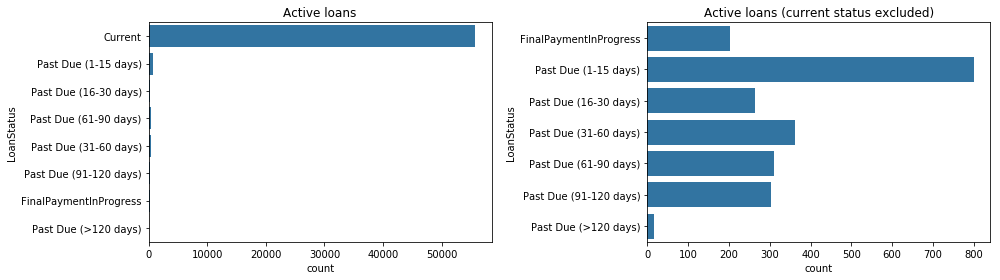

In [39]:
# Create two subplots for Active Loans. The second plot has 'Current' excluded
plt.figure(figsize = (14, 4))

# Subplot 1
plt.subplot(1, 2, 1)

# set base color for plots
base_color = sb.color_palette()[0]

sb.countplot(data = df_target[df_target.ActiveLoanStatus == 1],
             y = 'LoanStatus', color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans')

# subplot 2
plt.subplot(1, 2, 2)
order = ['FinalPaymentInProgress', 'Past Due (1-15 days)',
         'Past Due (16-30 days)', 'Past Due (31-60 days)',
         'Past Due (61-90 days)', 'Past Due (91-120 days)',
         'Past Due (>120 days)']
sb.countplot(data = df_target[df_target.LoanStatus.isin(order)],
             y = 'LoanStatus', order = order, color = base_color, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Active loans (current status excluded)')
plt.tight_layout();

### Observations 1
- Loans without any issue in the 'Current' status are the most dorminant among the active loans
- When the 'current' status is excluded, the highes amount is in the '1-15 days' category

> Now, let us look at the bar plots for Not Active loans category.

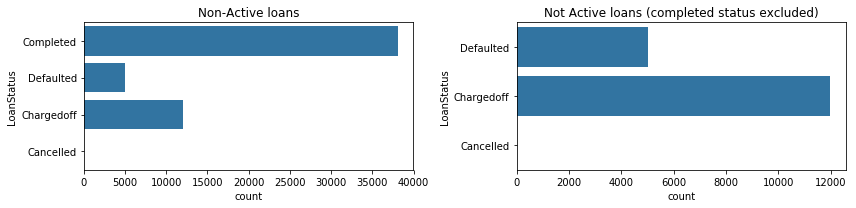

In [40]:
# Create two subplots for Not Active Loans. The second plot has 'Completed' status excluded
plt.figure(figsize = (12, 3))

# Subplot 1
plt.subplot(1, 2, 1)
sb.countplot(data = df_target[df_target.ActiveLoanStatus == 0], y = 'LoanStatus', color = base_color)
plt.xticks(rotation = 0)
plt.title('Non-Active loans')

# Subplot 2
plt.subplot(1, 2, 2)
sb.countplot(data = df_target[df_target.LoanStatus.isin(['Defaulted', 'Chargedoff', 'Cancelled'])],
             y = 'LoanStatus', color = base_color)
plt.xticks(rotation = 0)
plt.title('Not Active loans (completed status excluded)')
plt.tight_layout();

### Observations 2
- Loans in the 'Completed' status are the most dorminant among the Not active loans
- When the 'Completed' status is excluded,i.e. when we consider not active loans in the not-paid group, we have more of the charged off loans (the chance of repayment is minimal) than the defaulted ones.
- We do not have any loan in the 'Cancelled' category.

### Qn.2 How is the employment status of borrowers distributed?

> Using a Bar chart, we are going to see the distribution of employment status categories.

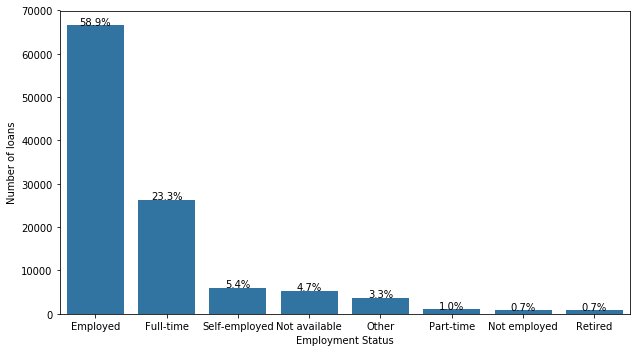

In [41]:
plt.figure(figsize = [9, 5]) # Size of the figure
status_counts = df_target.EmploymentStatus.value_counts()
status_order = status_counts.index
max_count = status_counts[0]
max_prop = max_count / df.shape[0]
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props] 

g = sb.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = status_order)
plt.xticks(rotation = 0)
plt.xlabel('Employment Status')
plt.ylabel('Number of loans')


# values must be ordered from the largest for this to work
for i in range(status_counts.shape[0]):
    count = status_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / df.shape[0])
    plt.text(i, count + 10, pct_string, ha = 'center')

plt.tight_layout()

### Observations 
- It is observed that majority of the Borrowers are employed and the category with least number of borrowers is 'Retired'

### Qn.3 How is the Loan amount distributed?

> We are going to use two subplots to show how Loan Amount is distributed. First is a histogram showing clearly the bars and the second one is a distplot which on addition to the hitogram bars, adds a smooth line graph for clarity.

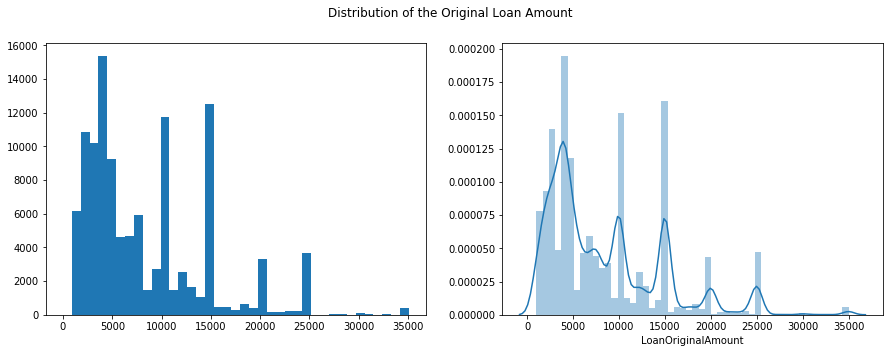

In [42]:
plt.figure(figsize = (15, 5))
plt.suptitle('Distribution of the Original Loan Amount')

# First subplot - the histogram
plt.subplot(1, 2, 1)
bins = np.arange(0, df_target['LoanOriginalAmount'].max()+900, 900)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

# Second subplot - the distplot
plt.subplot(1, 2, 2)
sb.distplot(df_target['LoanOriginalAmount']);

### Observation
- As shown in the histogram, Loan amounts are skewed to the right
- The amount that is most frequently loaned is around 4,000

### Qn.4 Which term has the vast majority of loans?

> Let us use a bar plot to see distribution of loan terms.

In [43]:
# Find the unique values for the terms and display their espective value counts.
df_target.Term.value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

> We can see that Loan terms have 3 unique values/categories, that is, 36 months, 60 months and 12 months.

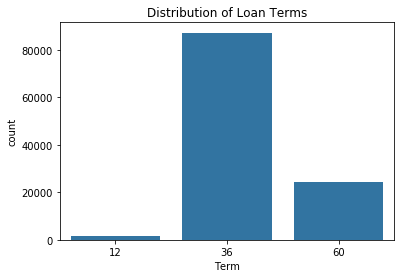

In [44]:
# Barplot to show the distribution of terms
sb.countplot(data = df_target, x = 'Term', color = base_color);
plt.title('Distribution of Loan Terms');

### Observation
- The vast majority of loans have a term of 36 months. This is followed by 60 months and then 12 months

### Qn.5 What is the comparison between BorrowerAPR and BorrowerRate?

> Before we plot graphs to show the comparison, we have to remember that BorrowerAPR has missing values.We shall first fill in the missing values using the mean() because the arange() function does not work with nulls.

In [45]:
# Find the total number of null values in the 'BorrowerAPR' variable
df_target.BorrowerAPR.isnull().sum()

25

In [46]:
# Fill in the missing values
df_target.BorrowerAPR = df_target.BorrowerAPR.fillna(df_target.BorrowerAPR.mean())

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


> After filling in the missing values, when we check for total number of missing values, we get 0 as shown below:

In [47]:
df_target.BorrowerAPR.isnull().sum()

0

> Now we are ready to have our plots. We are having two subplots. First is a histogram showing clearly the bars and the second one is a distplot which on addition to the hitogram bars, adds a smooth line graph for clarity.

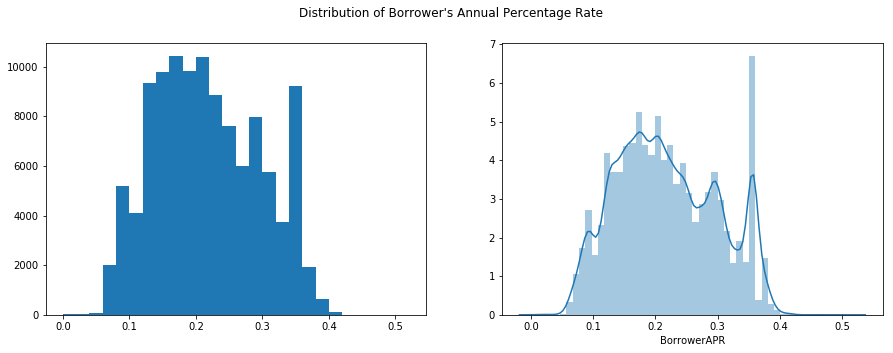

In [48]:
plt.figure(figsize=(15, 5))
plt.suptitle("Distribution of Borrower's Annual Percentage Rate")

# First plot
plt.subplot(1, 2, 1)
bins = np.arange(0, df_target.BorrowerAPR.max()+0.02, 0.02)
plt.hist(data = df_target, x = 'BorrowerAPR', bins = bins)

# Second plot
plt.subplot(1,2,2)
sb.distplot(df_target.BorrowerAPR);

> Let us also have visuals for 'BorrowerRate'. Still, we are having two subplots. First is a histogram showing clearly the bars and the second one is a distplot which on addition to the hitogram bars, adds a smooth line graph for clarity.

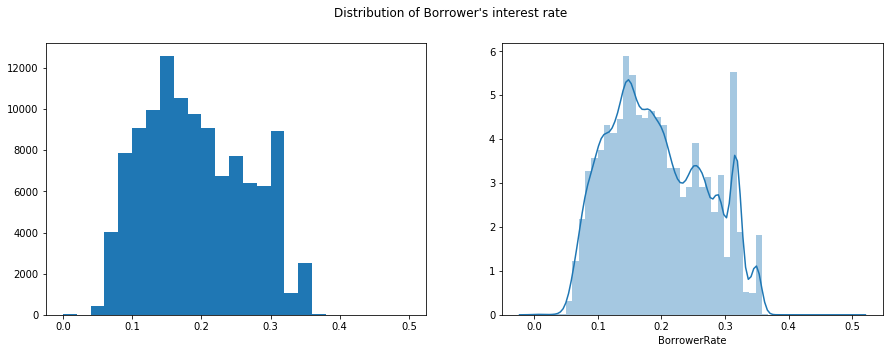

In [49]:
plt.figure(figsize = (15, 5))
plt.suptitle("Distribution of Borrower's interest rate")

# plot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, df_target.BorrowerRate.max()+0.02, 0.02)
plt.hist(data = df_target, x = 'BorrowerRate', bins = bins)

# plot 2
plt.subplot(1, 2, 2)
sb.distplot(df_target['BorrowerRate']);

> Now let us have the distplots generated from the 2 variables put together in one plot as subplots for clear comparison.

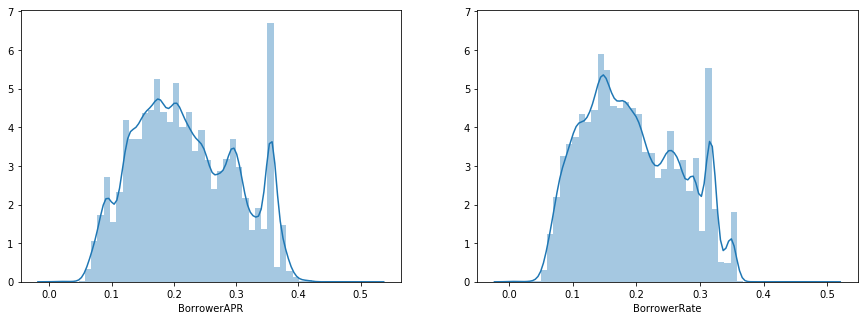

In [50]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

# 'BorrowerAPR' distplot
g = sb.distplot(df_target['BorrowerAPR'])

# 'BorrowerRate' distplot
plt.subplot(1, 2, 2)
sb.distplot(df_target['BorrowerRate'])
plt.ylim(g.get_ylim());

### Observations 1
- From the visualizations above, BorrowerAPR and BorrowerRate have almost similar distributions

>Let us further explore their descriptive statistics using the describe() function

In [51]:
# display the descriptive statistics of the two variables, 'BorrowerAPR' and 'BorrowerRate'
df_target[['BorrowerAPR', 'BorrowerRate']].describe()

,BorrowerAPR,BorrowerRate
count,113066.000000,113066.000000
mean,0.218980,0.192946
std,0.080474,0.074917
min,0.006530,0.000000
25%,0.156290,0.134000
50%,0.209860,0.184000
75%,0.283860,0.250600
max,0.512290,0.497500


### Observations 2
- The results in the cell above further comfirm that BorrowerAPR and BorrowerRate contain the same information.
- BorrowerAPR rate is somewhat larger since it contains fees.

> So, we are going to keep just one of them and drop the other one:

In [52]:
# Drop the 'BorrowerRate' column from our target dataset
df_target.drop('BorrowerRate', axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - Loan amount distribution skewed to the right and is multimodal. The amount that is most frequently loaned is 4,000, followed by 15,000 and then 10,000
> - The interest rate variables, BorrowerAPR and BorrowerRate contain the same information. I dropped one and remained with the Annual Percentage Rate (BorrowerAPR)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there were some unsual distributions.
>- I had to lessen the number of categories for income ranges by 1. I did this by joining '$0' category with the 'Not Empoloyed' category

>- More so, I created a new column called 'ActiveLoanStatus' using the 'ClosedDate' column, to divide 'LoanStatus' into 2 distinct groups, Active Loans & Not Active Loans. I did this to quickly filter all active or not active loan statuses.

## Bivariate Exploration

### Qn.1 What are numeric varaibles correlated to eachother? 

>Using a heatmap, let us preview the correlations between our numeric variables

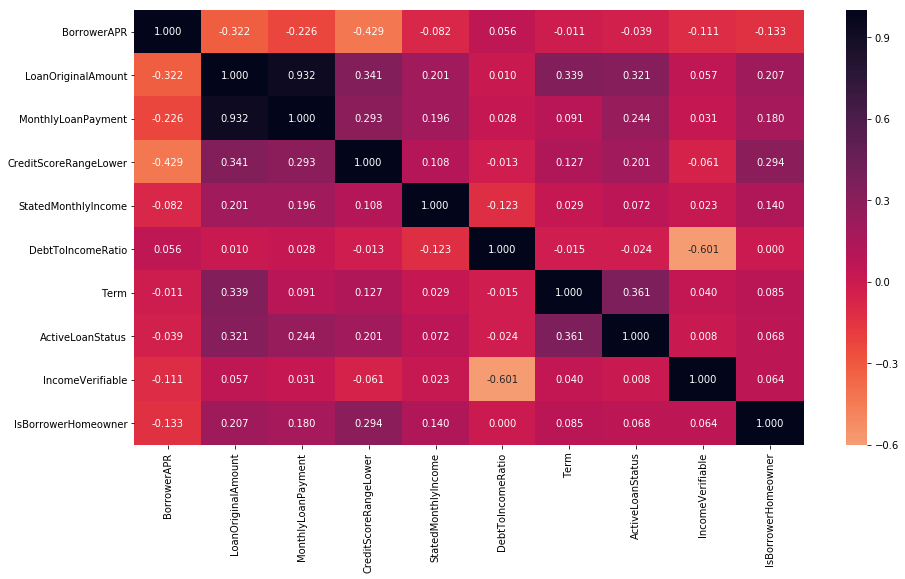

In [53]:
# correlations
plt.figure(figsize = [15, 8])
sb.heatmap(df_target[['BorrowerAPR', 'LoanOriginalAmount',
                      'MonthlyLoanPayment', 'CreditScoreRangeLower',
                      'StatedMonthlyIncome', 'DebtToIncomeRatio',
                      'Term', 'ActiveLoanStatus',
                      'IncomeVerifiable', 'IsBorrowerHomeowner']]
           .corr(), annot = True, fmt = '.3f',
           cmap = 'rocket_r', center = 0)

plt.show();

### Observation 1
- As shown in the heatmap, some variables are positively correlated, others correlated negatively, and others not correlated

>Based on the correlations, we are going to focus on our dependent variables of interest, BorrowerAPR and LoanOriginalAmount. So we are going to explore the following relationships:
>- BorrowerAPR Vs. LoanOriginalAmount
> - BorrowerAPR Vs. CreditScoreRangeLower
> - LoanOriginalAmount Vs. MonthlyLoanPayment
> - LoanOriginalAmount Vs. CreditScoreRangeLower

> Let us begin with sublots showing BorrowerAPR Vs. LoanOriginalAmount and BorrowerAPR Vs. CreditScoreRangeLower.

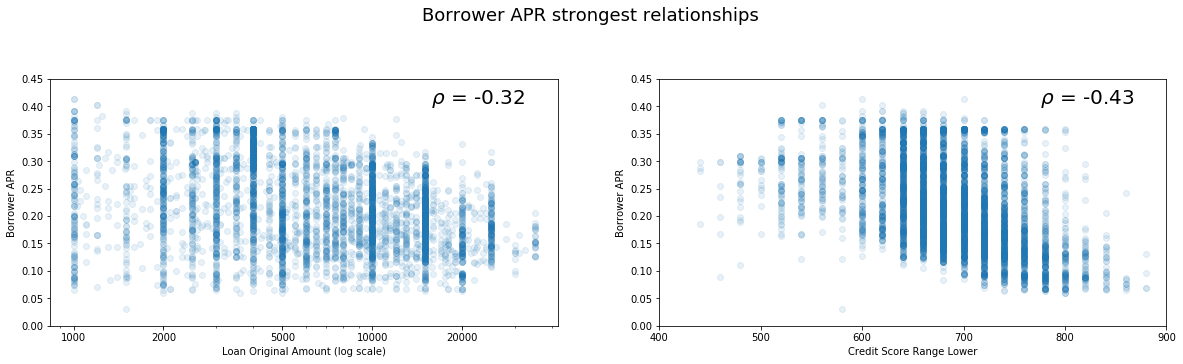

In [54]:
# Take a sample of 5000 from the dataset
sample = np.random.choice(df_target.shape[0], 5000, replace = False)
df_samp = df_target.iloc[sample,:]

plt.figure(figsize = (20, 10))

# BorrowerAPR Vs. LoanOriginalAmount subplot
plt.subplot(2, 2, 1)
g = plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xscale('log')
plt.xlabel('Loan Original Amount (log scale)')
plt.ylabel('Borrower APR')
plt.ylim((0, 0.45))
plt.xticks([1000, 2000, 5000, 10000, 20000], [1000, 2000, 5000, 10000, 20000])

# display the correlation
ax = plt.gca()
coef = df_target[['LoanOriginalAmount', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)


# BorrowerAPR Vs. CreditScoreRangeLower subplot
plt.subplot(2, 2, 2)

plt.scatter(data = df_samp, x = 'CreditScoreRangeLower',
            y = 'BorrowerAPR', alpha = 1/10)

plt.xlabel('Credit Score Range Lower')
plt.ylabel('Borrower APR')
plt.xlim((400, 900))
plt.ylim((0, 0.45))

# display the correlation
ax = plt.gca()
coef = df_target[['CreditScoreRangeLower', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)

plt.suptitle('Borrower APR strongest relationships', size = 18);

### Observation 2
- BorrowerAPR and loan original amount, BorrowerAPR and Credit Score Range Lower have negative correlation and it is somehow visible in the scatter plots. Both of these plots make a logical sense.


> Next, we look at LoanOriginalAmount Vs. MonthlyLoanPayment and LoanOriginalAmount Vs. CreditScoreRangeLower

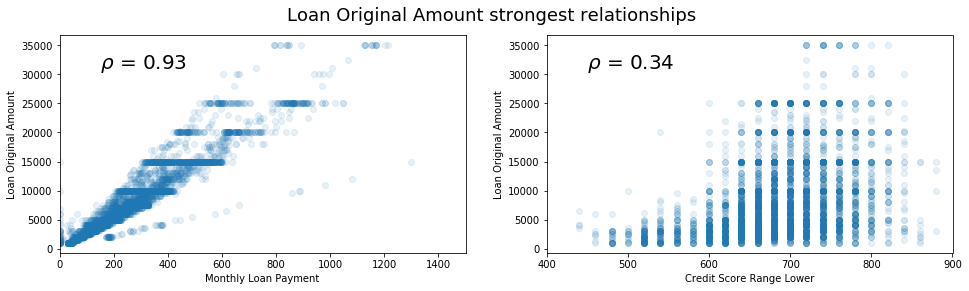

In [55]:
plt.figure(figsize = (16, 4))

# LoanOriginalAmount Vs. MonthlyLoanPayment subplot
plt.subplot(1, 2, 1)
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment',
            y = 'LoanOriginalAmount', alpha = 1/10)

plt.ylabel('Loan Original Amount')
plt.xlabel('Monthly Loan Payment')
plt.xlim((0, 1500))

# display the correlation
ax = plt.gca()
coef = df_target[['MonthlyLoanPayment', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)

# LoanOriginalAmount Vs. CreditScoreRangeLower subplot
plt.subplot(1, 2, 2)
plt.scatter(data = df_samp, x = 'CreditScoreRangeLower',
            y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Loan Original Amount')
plt.xlim((400, 900))

# display the correlation
ax = plt.gca()
coef = df_target[['CreditScoreRangeLower',
                  'LoanOriginalAmount']].corr().iloc[1,0]
    
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)
plt.suptitle('Loan Original Amount strongest relationships', size = 18);

### Observation 3
- Loan Original amount and Monthly Loan Payment have a very high positive correlation
- Also, Loan Original amount and Credit Score Range Lower have a positive correlation and it is very visible in the scatter plots.
This makes a logical sense.


> #### Now, we are going to explore the relationships between our variables of interest and the categorical variables. 

> Let us first create three Lists variables, numeric_vars, bool_vars, and ordered_categoric_vars, to store numeric variables, boolean variables and ordered categoric variables respectively. 

In [56]:
# numeric variables
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount',
                'MonthlyLoanPayment', 'CreditScoreRangeLower',
                'StatedMonthlyIncome', 'DebtToIncomeRatio',
                'MonthsToClosed', 'Term']

# boolean variables
bool_vars = ['LoanStatusActive', 'IncomeVerifiable', 'IsBorrowerHomeowner']

# ordered categoric variables
ordered_categoric_vars = ['IncomeRange']

### Qn.3 How do the different 'IncomeRange' categories relate with 'BorrowerAPR' & 'LoanOriginalAmount' ? 

> Using box plots, we can see how each category Income Range relates to Borrower APR and Loan Original Amount in general

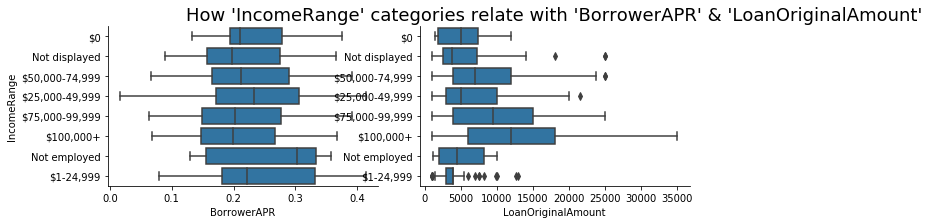

In [57]:
# sample of 5000
samples = np.random.choice(df_target.shape[0], 1000, replace = False)
df_samp = df.iloc[samples,:]


def boxgrid(x, y, **kwargs):
    """Function for creating box plots with seaborn's PairGrid"""
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [30, 30])
g = sb.PairGrid(data = df_samp, x_vars = ['BorrowerAPR','LoanOriginalAmount'],
                y_vars = ordered_categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.title("How 'IncomeRange' categories relate with 'BorrowerAPR' & 'LoanOriginalAmount'", size='18')
plt.show();

### Qn.4 How does Income Verifiable Status affect Borrower APR ?

> Using Facet grid, we explore how the Income verifiable status affects the interest rate of the borower.

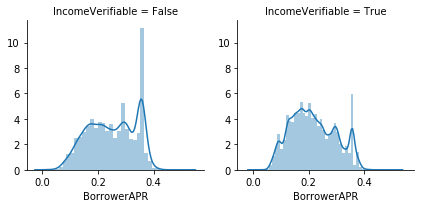

In [58]:
# Plot the facet grid of BorrowerAPR on IncomeVerifiable
g = sb.FacetGrid(data = df_target, col = 'IncomeVerifiable')
g.map(sb.distplot, 'BorrowerAPR');

### Observation 
- It is observed that Borrowers with a verifiable income tend to benefit from a relatively lower rate.

### Qn.5 Does Owning a home affect the Loan amount?

> Using Facet grid, we explore if owning a home by the borrower affects the Loan Amount.

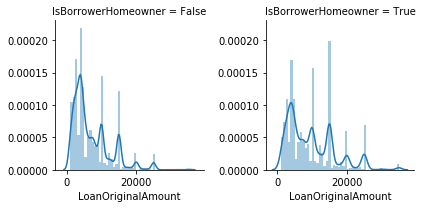

In [59]:
# Plot the facet grid of LoanOriginalAmount on IsBorrowerHomeowner
f = sb.FacetGrid(data = df_target, col = 'IsBorrowerHomeowner')
f.map(sb.distplot, 'LoanOriginalAmount');

### Observation
- Those Borrowers who own a home generally get higher loan amounts.

### Qn.6 How does Loan Oiginal Amount relate to Term?

> We now use violin plots to see the area of concentration of Loan Amount as distributed in the loan terms. These plots also hep us do identify outliers just like box plots.

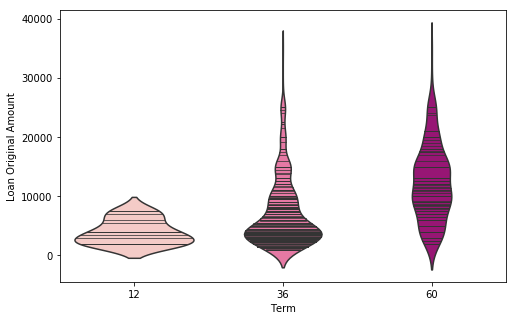

In [60]:
plt.figure(figsize = (8, 5)) # Figue size

# Violin plot
vio = sb.violinplot(data = df_samp, x = "Term", y = "LoanOriginalAmount", inner = 'stick', palette = 'RdPu')

plt.ylabel('Loan Original Amount')
plt.show();

### Observation
- From the Violin plots shown, Majority of Borrowers with a term of 12 months are given a Loan Amount between 1K and 6k.
- For Borrowers with a term of 36 months, the majority get up to 6k but a few can get up up to 18k. There are some outliers clearly seen
- For Borowers with 60 months, the majority get Loan amount up to 18k but a few can get up to 28k. There are also a few outlier seen

### Qn.7 How does BorrowerAPR relate to Term?

> Using violin plots to see the area of concentration of Borrowe Interest Rate as distributed in the loan terms. These plots also hep us do identify outliers just like box plots.

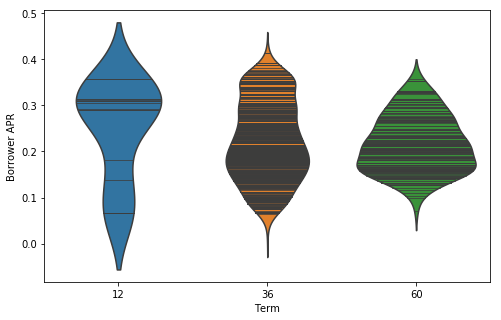

In [61]:
plt.figure(figsize = (8,5)) # Figure size

# Violin plot
vio = sb.violinplot(data = df_samp, x = "Term", y = "BorrowerAPR", inner = 'stick', palette = sb.color_palette())

plt.ylabel('Borrower APR')
plt.show();

### Observation
- From the Violin plots plotted, with a term of 12 months, BorrowerAPR is concentrated between 0.05 and 0.31. 
- With a term of 36 months,BorrowerAPR is concentrated between 0.1 and 0.35.
- With a term of 60 months, it is concentrated between 0.15 and 0.21 and then some good concentration from 0.21 to 0.32

### Qn.7 How do Employment Status categories with Terms affect the Loan Count?

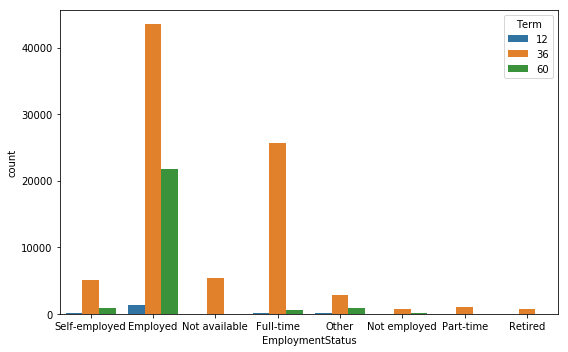

In [62]:
plt.figure(figsize = [8,5])
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term')
plt.tight_layout();

### Observation
- It is seen that employed borrowers get loans with term 60 much more frequently than other groups

### Qn.8 How do Employment Status categories with Home Owner Status affect the Loan Access?

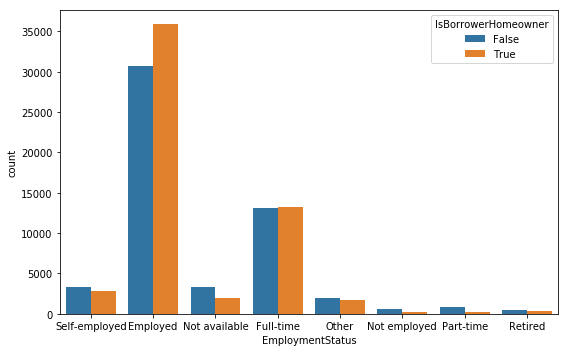

In [63]:
plt.figure(figsize = [8, 5])
sb.countplot(data = df_target, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner')
plt.tight_layout();

### Observations
- It is observed that employed borrowers are the only group with strongly more home owners among others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Borrower APR is negatively correlated with the loan original amount. Borrower APR is negatively correlated with credit score range lower. All of which makes sense. If you can borrow larger amounts, you are likely a more solvent borrower, therefore you get a lower interest rate and you have a higher credit score
> -  There is a positive correlation between loan original amount with monthly loan payment and with credit score.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Higher income borrowers and home owners borrow higher amounts for lower rates compared with lower income borrowers.
> - Unemployed borrowers pay the highest interest among all employment statuses.

## Multivariate Exploration

### Qn.1 How do Home owners compare to non home owners in terms of Loan amount and BorrowerAPR?

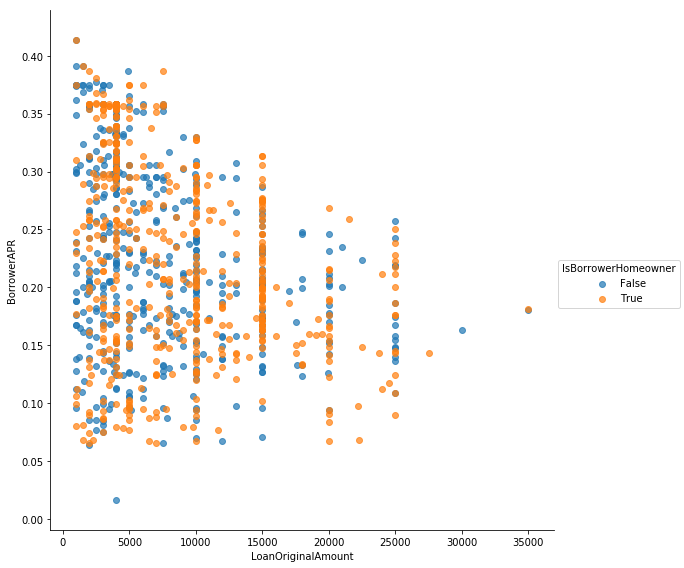

In [64]:
h = sb.FacetGrid(data = df_samp,
                 hue = 'IsBorrowerHomeowner',
                 size = 8)

h.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha = 0.7)
h.add_legend()
plt.show()

### Observations
- I can be observed that home owners borrow higher amounts more frequently

### Qn.2 What is the relationship between loan amounts, interest rate and monthly loan payment?

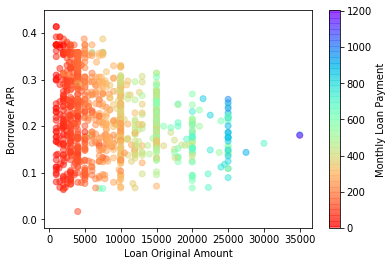

In [65]:
plt.scatter(data = df_samp,
            x = 'LoanOriginalAmount',
            y = 'BorrowerAPR',
            alpha = 1/2,
            c = 'MonthlyLoanPayment',
            cmap = 'rainbow_r')

plt.colorbar(label = 'Monthly Loan Payment')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.show()

### Observation
- It is observed that the higher the loan amounts, the lower the interest rate and the higher the monthly payments

### Qn.3 How does owning a house affects the borrower's interest rate thoughout the years?

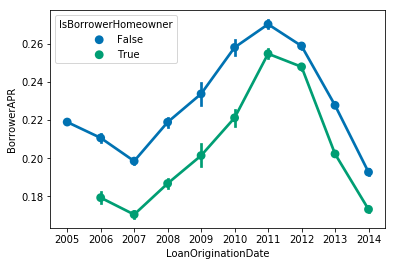

In [66]:
sb.pointplot(data = df_target,
             x = df_target['LoanOriginationDate']
             .dt.year,
             y = 'BorrowerAPR',
             hue = 'IsBorrowerHomeowner',
             palette = 'colorblind');

### Observation
- It is observed that borrowers not owning a house pay a higher interest throughout the years as opposed to their counterparts who own the house.

### Qn.4 How does owning a house affects the borrower's Loan Amount thoughout the years?

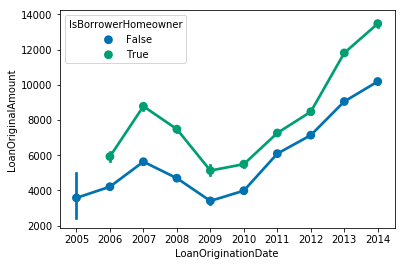

In [67]:
sb.pointplot(data = df_target,
             x = df_target['LoanOriginationDate']
             .dt.year,
             y = 'LoanOriginalAmount',
             hue = 'IsBorrowerHomeowner',
             palette = 'colorblind');

### Observation
- It is observed that borrowers who own a house borrow more money on average throughout the years as opposed to their counterparts who do not own the house.

### Qn.5 Does Income Range affect the borrower's Interest rate throughout the years?

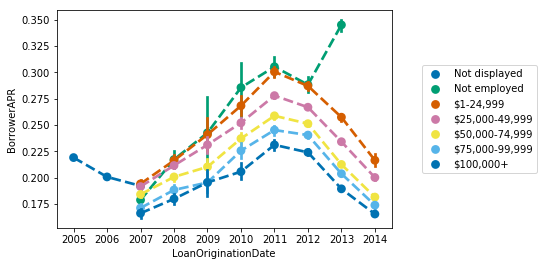

In [68]:
sb.pointplot(data = df_target,
             x = df_target['LoanOriginationDate']
             .dt.year,
             y = 'BorrowerAPR',
             hue = 'IncomeRange',
             palette = 'colorblind',
             linestyles = '--')

plt.legend(loc = 'right', bbox_to_anchor=(1.45, 0.5), ncol=1);

### Observation
- It is observed that Income Range does not seem to affect much the Borrower's Interest Rate.

### Qn.6 Does Income Range affect the borrower's Loan Amount throughout the years?

In [ ]:
sb.pointplot(data = df_target,
             x = df_target['LoanOriginationDate']
             .dt.year,
             y = 'LoanOriginalAmount',
             hue = 'IncomeRange', 
             palette = 'rainbow_r',
             linestyles = '--')

plt.legend(loc = 'right', bbox_to_anchor=(1.45, 0.5), ncol=1);

### Observation
- Income range generally affects the borrower's Loan Amount throughout the years. Borrowers with higher income rates more frequently receive higher Loan Amounts through the years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The higher the loan amounts, the lower the interest rate and the higher the monthly payments
> - Borrowers who do not own a house pay a higher interest throughout the years 
> - Borrowers who own a house borrow more money on average throughout the years
> - There is an upward trend in Loan Amounts for the last few years.
> - Borrowers with higher income rates more frequently receive higher Loan Amounts through the years.

### Were there any interesting or surprising interactions between features?

> Yes, I found out that house ownership and income range are essential for borrower segmentation. It is observed that home owners borrow higher amounts more frequently and borrowers with higher income rates more frequently receive higher Loan Amounts through the years.

## Conclusions
>Below is the summary of the main findings:
- The amount that is most frequently loaned is 4,000, followed by 15,000 and then 10,000.
- The interest rate variables, BorrowerAPR and BorrowerRate contain the same information.
- Borrower APR is negatively correlated with the loan original amount. Borrower APR is negatively correlated with credit score range lower.
- There is a positive correlation between loan original amount with monthly loan payment and with credit score.
- Higher income borrowers and home owners borrow higher amounts for lower rates compared with lower income borrowers.
- Unemployed borrowers pay the highest interest among all employment statuses.
- The higher the loan amounts, the lower the interest rate and the higher the monthly payments
- Borrowers who do not own a house pay a higher interest throughout the years
- Borrowers who own a house borrow more money on average throughout the years
- There is an upward trend in Loan Amounts for the last few years.
- Borrowers with higher income rates more frequently receive higher Loan Amounts through the years.

